In [1]:
from chebGreen import ChebGreen
import numpy as np
import matplotlib.pyplot as plt

from chebGreen.chebpy2 import Quasimatrix
from chebGreen.chebpy2.chebpy import chebfun
from chebGreen.chebpy2 import Chebfun2

# %env TF_MLC_LOGGING=1
# %env TF_CPP_MIN_LOG_LEVEL=2

In [2]:
Theta = [1.0,2.0,3.0]
domain = [-1,1,-1,1]
generateData = True
script = "generate_example"
example = "advection_diffusion"
dirichletBC = True
advecDiff = ChebGreen(Theta, domain, generateData, script, example, dirichletBC)

Generating dataset for example 'advection_diffusion'
### Example = advection_diffusion @ theta = 1 ###
Number of samples: 100
Length scale: 0.01
Nf: 500
Nu: 500
Noise: 0%
---------------------------------------
Step = 1/100
Step = 2/100
Step = 3/100
Step = 4/100
Step = 5/100
Step = 6/100
Step = 7/100
Step = 8/100
Step = 9/100
Step = 10/100
Step = 11/100
Step = 12/100
Step = 13/100
Step = 14/100
Step = 15/100
Step = 16/100
Step = 17/100
Step = 18/100
Step = 19/100
Step = 20/100
Step = 21/100
Step = 22/100
Step = 23/100
Step = 24/100
Step = 25/100
Step = 26/100
Step = 27/100
Step = 28/100
Step = 29/100
Step = 30/100
Step = 31/100
Step = 32/100
Step = 33/100
Step = 34/100
Step = 35/100
Step = 36/100
Step = 37/100
Step = 38/100
Step = 39/100
Step = 40/100
Step = 41/100
Step = 42/100
Step = 43/100
Step = 44/100
Step = 45/100
Step = 46/100
Step = 47/100
Step = 48/100
Step = 49/100
Step = 50/100
Step = 51/100
Step = 52/100
Step = 53/100
Step = 54/100
Step = 55/100
Step = 56/100
Step = 57/100


cp: savedModels/advection_diffusion/settings.ini: No such file or directory


Chebfun model added for example 'advection_diffusion' at Theta = 1.00

Training greenlearning model for example 'advection_diffusion' at Theta = 2.00
Training with Adam:
Loss at epoch 100: Training = 3.408E-02, Validation = 2.630E-02
Loss at epoch 200: Training = 8.321E-03, Validation = 7.867E-03
Loss at epoch 300: Training = 3.600E-03, Validation = 4.138E-03
Loss at epoch 400: Training = 2.191E-03, Validation = 2.644E-03
Loss at epoch 500: Training = 1.471E-03, Validation = 1.841E-03
Loss at epoch 600: Training = 9.907E-04, Validation = 1.250E-03
Loss at epoch 700: Training = 7.399E-04, Validation = 9.030E-04
Loss at epoch 800: Training = 5.963E-04, Validation = 6.884E-04
Loss at epoch 900: Training = 4.929E-04, Validation = 5.479E-04
Loss at epoch 1000: Training = 4.740E-04, Validation = 4.736E-04
Loss at epoch 1100: Training = 3.681E-04, Validation = 3.801E-04
Loss at epoch 1200: Training = 3.507E-04, Validation = 3.342E-04
Loss at epoch 1300: Training = 2.956E-04, Validation = 2.99

In [3]:
advecDiff.G

{1.0: chebfun2 object
      domain       rank               corner values
 [-1,1] x [-1,1]     57       [-0.000 0.000 -0.000 0.000]
 vertical scale = 0.677082,
 2.0: chebfun2 object
      domain       rank               corner values
 [-1,1] x [-1,1]     57       [-0.000 -0.000 -0.000 -0.000]
 vertical scale = 0.501129,
 3.0: chebfun2 object
      domain       rank               corner values
 [-1,1] x [-1,1]     57       [-0.000 -0.000 -0.000 -0.000]
 vertical scale = 0.367264}

CPU times: user 25.6 s, sys: 30.6 s, total: 56.2 s
Wall time: 15.6 s


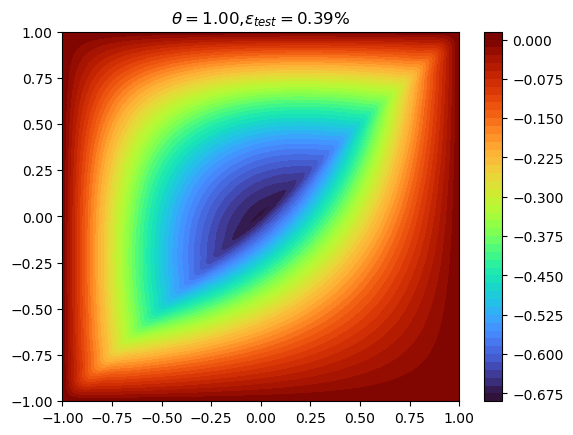

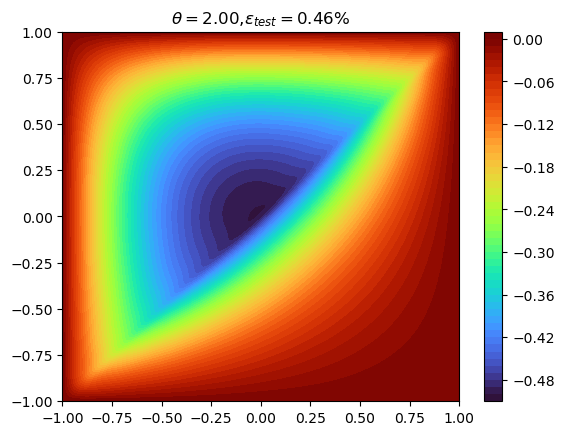

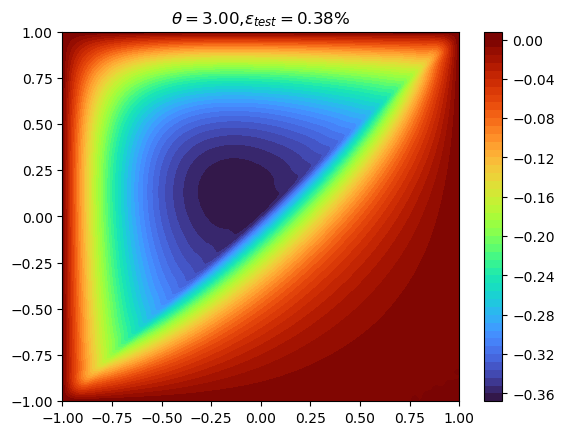

In [4]:
%%time
for t in Theta:
    fig = plt.figure()
    advecDiff.G[t].plot(fig = fig)
    error = advecDiff.computeEmpiricalError(t)
    plt.title(f"$\\theta = {{{t:4.2f}}}$,$\\epsilon_{{test}} = {{{error*100:4.2f}}}\%$")

<Axes: >

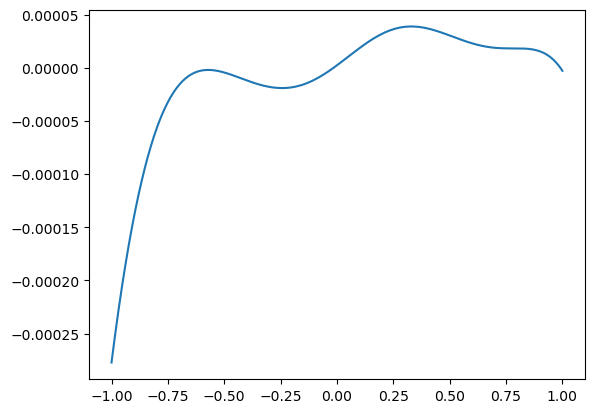

In [5]:
advecDiff.N[3.0].plot()

In [6]:
%%time
U, S, V = [],[],[]
for t in Theta:
    u,s,v = advecDiff.G[t].svd()
    U.append(u)
    S.append(s)
    V.append(v)

CPU times: user 8.58 s, sys: 17.8 s, total: 26.4 s
Wall time: 4.37 s


In [7]:
t = 0
u,s,v = U[t],S[t],V[t]

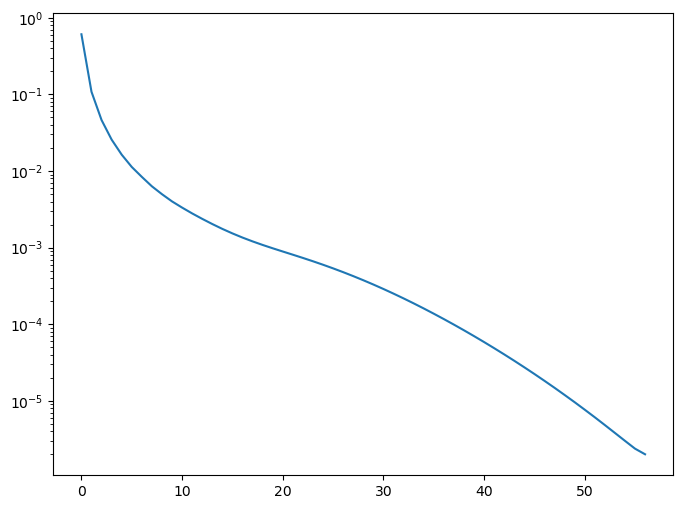

In [8]:
fig = plt.figure(figsize = (8,6))
plt.semilogy(s)

(-1.0, 1.0)

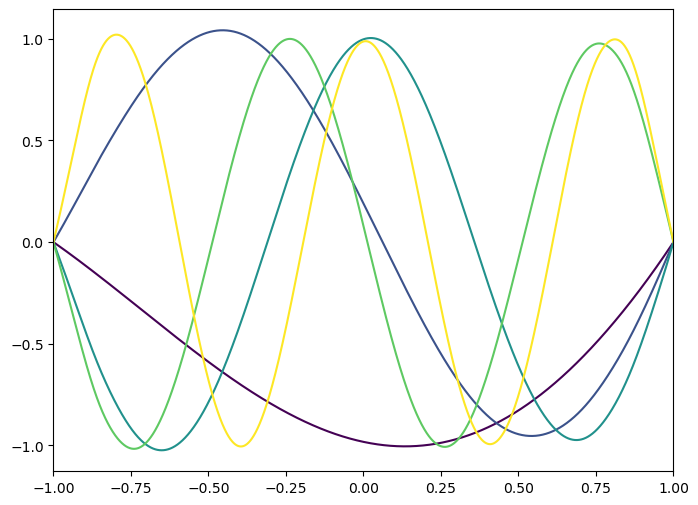

In [9]:
# i = slice(10,20)
i = slice(0,5)
# i = 16
fig = plt.figure(figsize = (8,6))
u[:,i].plot(fig = fig)
# print(np.max(u[:,i].vscale))
# plt.title(f'First {i+1} left singular functions for a Laplacian')
plt.xlim([-1,1])
# fig.savefig(f'Laplace-first.png', dpi = fig.dpi)

In [10]:
%%time
theta_ = 2.5
Ginterp, Ninterp = advecDiff.generateNewModel(theta_)

CPU times: user 20.8 s, sys: 29.1 s, total: 49.9 s
Wall time: 9.08 s


In [11]:
Ginterp

chebfun2 object
     domain       rank               corner values
[-1.0,1.0] x [-1.0,1.0]     57       [-0.000 0.000 -0.000 -0.000]
vertical scale = 0.428962

In [12]:
%%time
u,s,v = Ginterp.svd()

CPU times: user 3.78 s, sys: 7.48 s, total: 11.3 s
Wall time: 2.13 s


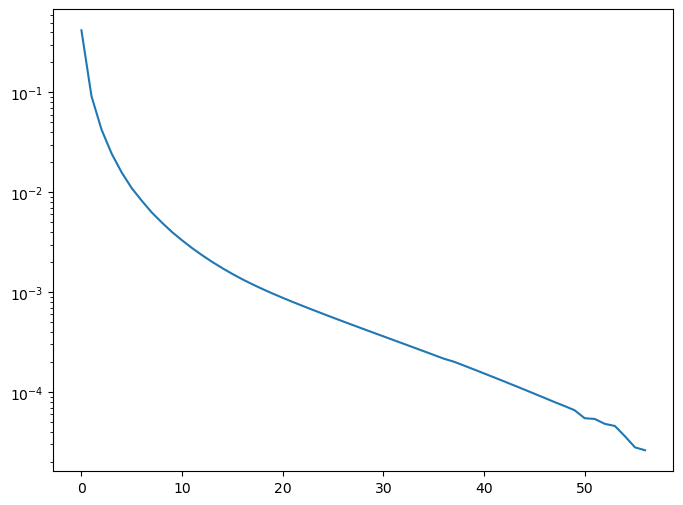

In [13]:
fig = plt.figure(figsize = (8,6))
plt.semilogy(s)

(-1.0, 1.0)

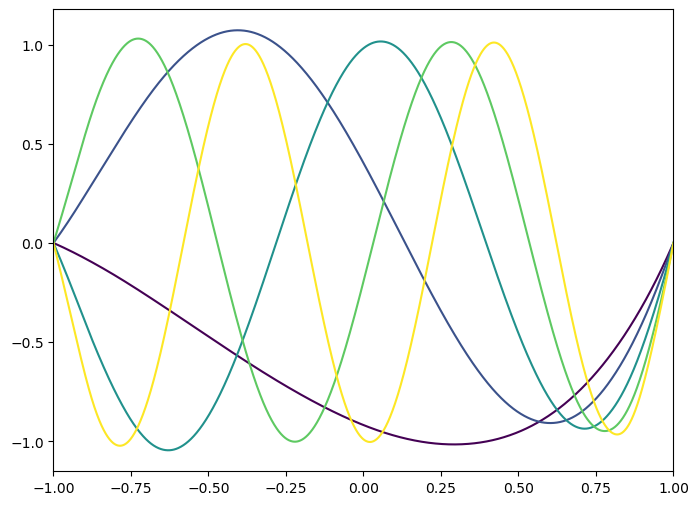

In [14]:
# i = slice(10,20)
i = slice(0,5)
# i = 16
fig = plt.figure(figsize = (8,6))
u[:,i].plot(fig = fig)
# print(np.max(u[:,i].vscale))
# plt.title(f'First {i+1} left singular functions for a Laplacian')
plt.xlim([-1,1])
# fig.savefig(f'Laplace-first.png', dpi = fig.dpi)

In [15]:
validation = ChebGreen([theta_], domain, generateData, script, example, dirichletBC)

Generating dataset for example 'advection_diffusion'
### Example = advection_diffusion @ theta = 2.5 ###
Number of samples: 100
Length scale: 0.01
Nf: 500
Nu: 500
Noise: 0%
---------------------------------------
Step = 1/100
Step = 2/100
Step = 3/100
Step = 4/100
Step = 5/100
Step = 6/100
Step = 7/100
Step = 8/100
Step = 9/100
Step = 10/100
Step = 11/100
Step = 12/100
Step = 13/100
Step = 14/100
Step = 15/100
Step = 16/100
Step = 17/100
Step = 18/100
Step = 19/100
Step = 20/100
Step = 21/100
Step = 22/100
Step = 23/100
Step = 24/100
Step = 25/100
Step = 26/100
Step = 27/100
Step = 28/100
Step = 29/100
Step = 30/100
Step = 31/100
Step = 32/100
Step = 33/100
Step = 34/100
Step = 35/100
Step = 36/100
Step = 37/100
Step = 38/100
Step = 39/100
Step = 40/100
Step = 41/100
Step = 42/100
Step = 43/100
Step = 44/100
Step = 45/100
Step = 46/100
Step = 47/100
Step = 48/100
Step = 49/100
Step = 50/100
Step = 51/100
Step = 52/100
Step = 53/100
Step = 54/100
Step = 55/100
Step = 56/100
Step = 57/10

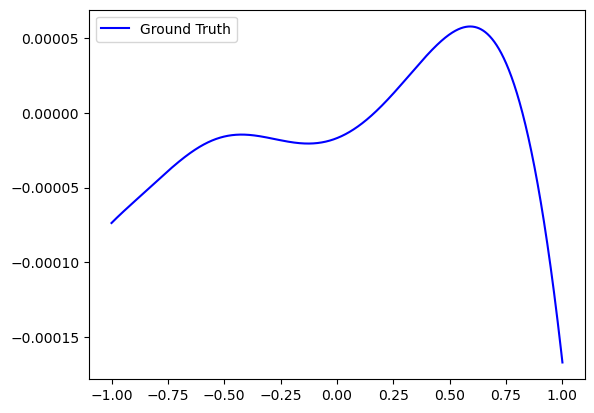

In [16]:
fig = plt.figure()
advecDiff.N[1.0].plot(fig = fig, color = 'b')
plt.legend(['Ground Truth', 'Interpolated'])

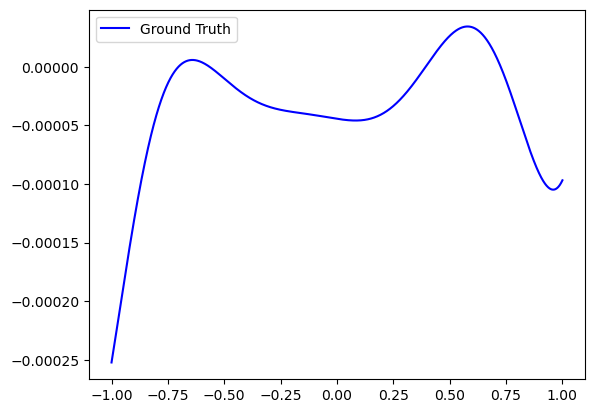

In [17]:
fig = plt.figure()
advecDiff.N[2.0].plot(fig = fig, color = 'b')
plt.legend(['Ground Truth', 'Interpolated'])

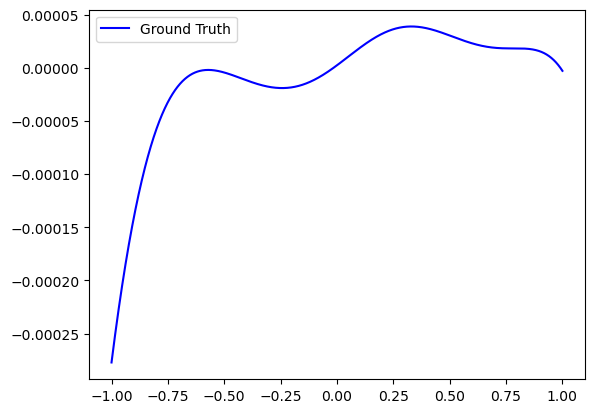

In [18]:
fig = plt.figure()
advecDiff.N[3.0].plot(fig = fig, color = 'b')
plt.legend(['Ground Truth', 'Interpolated'])

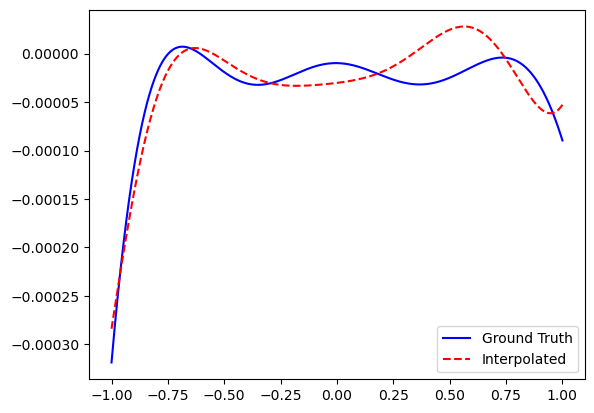

In [19]:
fig = plt.figure()
validation.N[theta_].plot(fig = fig, color = 'b')
Ninterp.plot(fig = fig, color = 'r', linestyle = '--')
plt.legend(['Ground Truth', 'Interpolated'])

CPU times: user 7.4 s, sys: 13.6 s, total: 21 s
Wall time: 5.17 s


Text(0.5, 1.0, 'Interpolated Model $\\theta = {2.50}$,$\\epsilon_{test} = {0.59}\\%$')

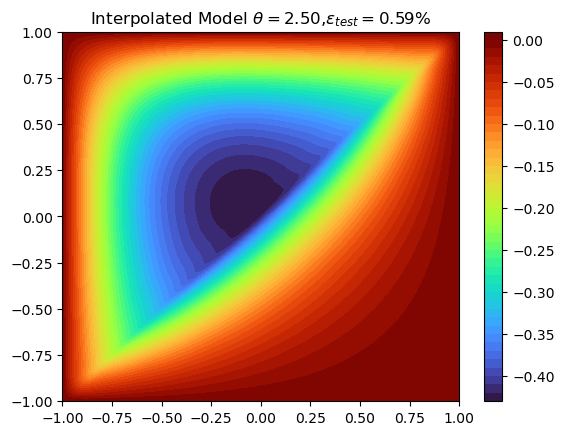

In [20]:
%%time
fig = plt.figure()
Ginterp.plot(fig = fig)
error = advecDiff.computeEmpiricalError(theta_)
plt.title(f"Interpolated Model $\\theta = {{{theta_:4.2f}}}$,$\\epsilon_{{test}} = {{{error*100:4.2f}}}\%$")

CPU times: user 7.89 s, sys: 14.3 s, total: 22.2 s
Wall time: 5.78 s


Text(0.5, 1.0, 'Validation Model $\\theta = {2.50}$,$\\epsilon_{test} = {0.38}\\%$')

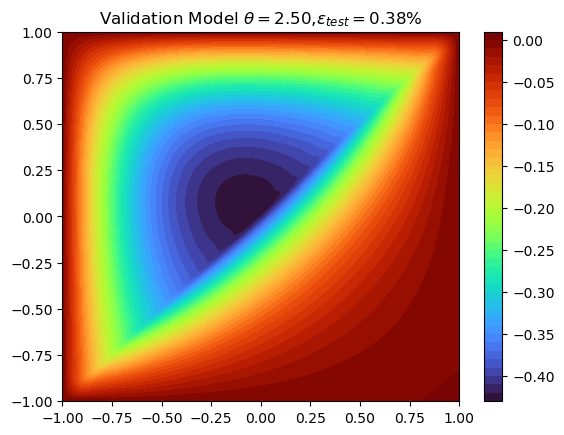

In [21]:
%%time
fig = plt.figure()
validation.G[theta_].plot(fig = fig)
error = validation.computeEmpiricalError(theta_)
plt.title(f"Validation Model $\\theta = {{{theta_:4.2f}}}$,$\\epsilon_{{test}} = {{{error*100:4.2f}}}\%$")

In [22]:
# vmin, vmax = -0.68,0.13
# Gplot = validation.G[theta_]

# xx = np.linspace(domain[0],domain[1],2000)
# yy = np.linspace(domain[2],domain[3],2000)
# x, y = np.meshgrid(xx,yy)
# Gplot = Gplot[x,y]

# fig = plt.figure(figsize = (13,10), frameon=False)
# plt.axis('off')
# plt.gca().set_aspect('equal', adjustable='box')
# levels = np.linspace(vmin, vmax, 50, endpoint = True)
# plt.contourf(x,y,Gplot, levels = levels, cmap = 'jet', vmin = vmin, vmax = vmax)
# # ticks = np.linspace(vmin, vmax, 10, endpoint=True)
# # cbar = plt.colorbar(ticks = ticks, fraction = 0.046, pad = 0.04)

# fig.savefig('advecdiff-E.png', dpi = fig.dpi, bbox_inches='tight', pad_inches=0)

In [23]:
def compareGreen1D(interpModel, exactModel, vmin = None, vmax = None):
    domain = interpModel.domain
    xx = np.linspace(domain[2],domain[3],2000)
    yy = np.linspace(domain[0],domain[1],2000)
    x, s = np.meshgrid(xx,yy)
    
    if vmin is None:
        vmin = min(interpModel.min,exactModel.min)
    if vmax is None:
        vmax = max(interpModel.max,exactModel.max)
        
    plt.figure(figsize = (16,6))
    plt.subplot(121)
    
    GInterp = interpModel[x,s]
    
    levels = np.linspace(vmin, vmax, 50, endpoint = True)
    ticks = np.linspace(vmin, vmax, 10, endpoint=True)
    
    surf = plt.contourf(x, s, GInterp, levels = levels, cmap = 'turbo', vmin = vmin, vmax = vmax)
    plt.gca().set_aspect('equal', adjustable='box')
    cbar = plt.colorbar(ticks = ticks, fraction = 0.046, pad = 0.04)
    cbar.ax.set_yticklabels(["{:4.2f}".format(i) for i in ticks])
    plt.xlabel('$x$', fontsize = 11)
    plt.ylabel('$s$', rotation='horizontal', labelpad=10, fontsize = 11)
    plt.title("Interpolated", fontsize = 14)
    
    GExact = exactModel[x,s]
    
    plt.subplot(122)
    plt.gca().set_aspect('equal', adjustable='box')
    surf = plt.contourf(x, s, GExact, levels = levels, cmap = 'turbo', vmin = vmin, vmax = vmax)
    cbar = plt.colorbar(ticks = ticks, fraction = 0.046, pad = 0.04)
    cbar.ax.set_yticklabels(["{:4.2f}".format(i) for i in ticks])
    plt.xlabel('x', fontsize = 11)
    plt.ylabel('s', rotation='horizontal', labelpad=10, fontsize = 11)
    plt.title("Data", fontsize = 14)

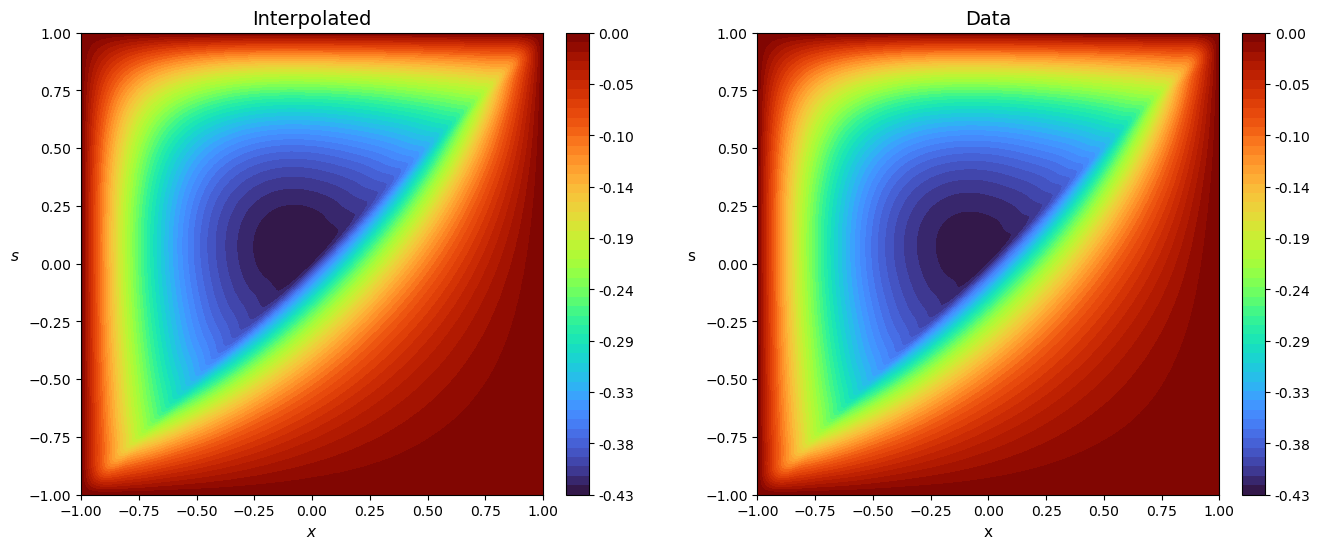

In [24]:
compareGreen1D(Ginterp,validation.G[theta_])

In [25]:
# vmin, vmax = -0.4,0.5
# theta = Theta[0]
# G = mean.G[theta]

# xx = np.linspace(domain[0],domain[1],2000)
# yy = np.linspace(domain[2],domain[3],2000)
# x, y = np.meshgrid(xx,yy)
# G = G[x,y]

# fig = plt.figure(figsize = (13,10), frameon=False)
# plt.axis('off')
# plt.gca().set_aspect('equal', adjustable='box')
# levels = np.linspace(vmin, vmax, 50, endpoint = True)
# plt.contourf(x,y,G, levels = levels, cmap = 'jet', vmin = vmin, vmax = vmax)
# # ticks = np.linspace(vmin, vmax, 10, endpoint=True)
# # cbar = plt.colorbar(ticks = ticks, fraction = 0.046, pad = 0.04)

# fig.savefig('interp-A.png', dpi = fig.dpi, bbox_inches='tight', pad_inches=0)